Importing the libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

Importing the dataset

In [50]:
file="Heart_Disease_Statlog.csv"
data=pd.read_csv(file)

Data Description

In [51]:
data.shape

(270, 14)

In [52]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [53]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


Assigning the Independent and dependent variables

In [55]:
X=data.iloc[:,:13]
X.values

array([[70.,  1.,  3., ...,  1.,  3.,  1.],
       [67.,  0.,  2., ...,  1.,  0.,  3.],
       [57.,  1.,  1., ...,  0.,  0.,  3.],
       ...,
       [56.,  0.,  1., ...,  1.,  0.,  1.],
       [57.,  1.,  3., ...,  1.,  0.,  2.],
       [67.,  1.,  3., ...,  1.,  3.,  1.]])

In [56]:
y=data["target"]
y.values

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1], dtype=int64)

We are splitting the dataset into testsing and training data (80% to 20%)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Data Analysis and Visualization

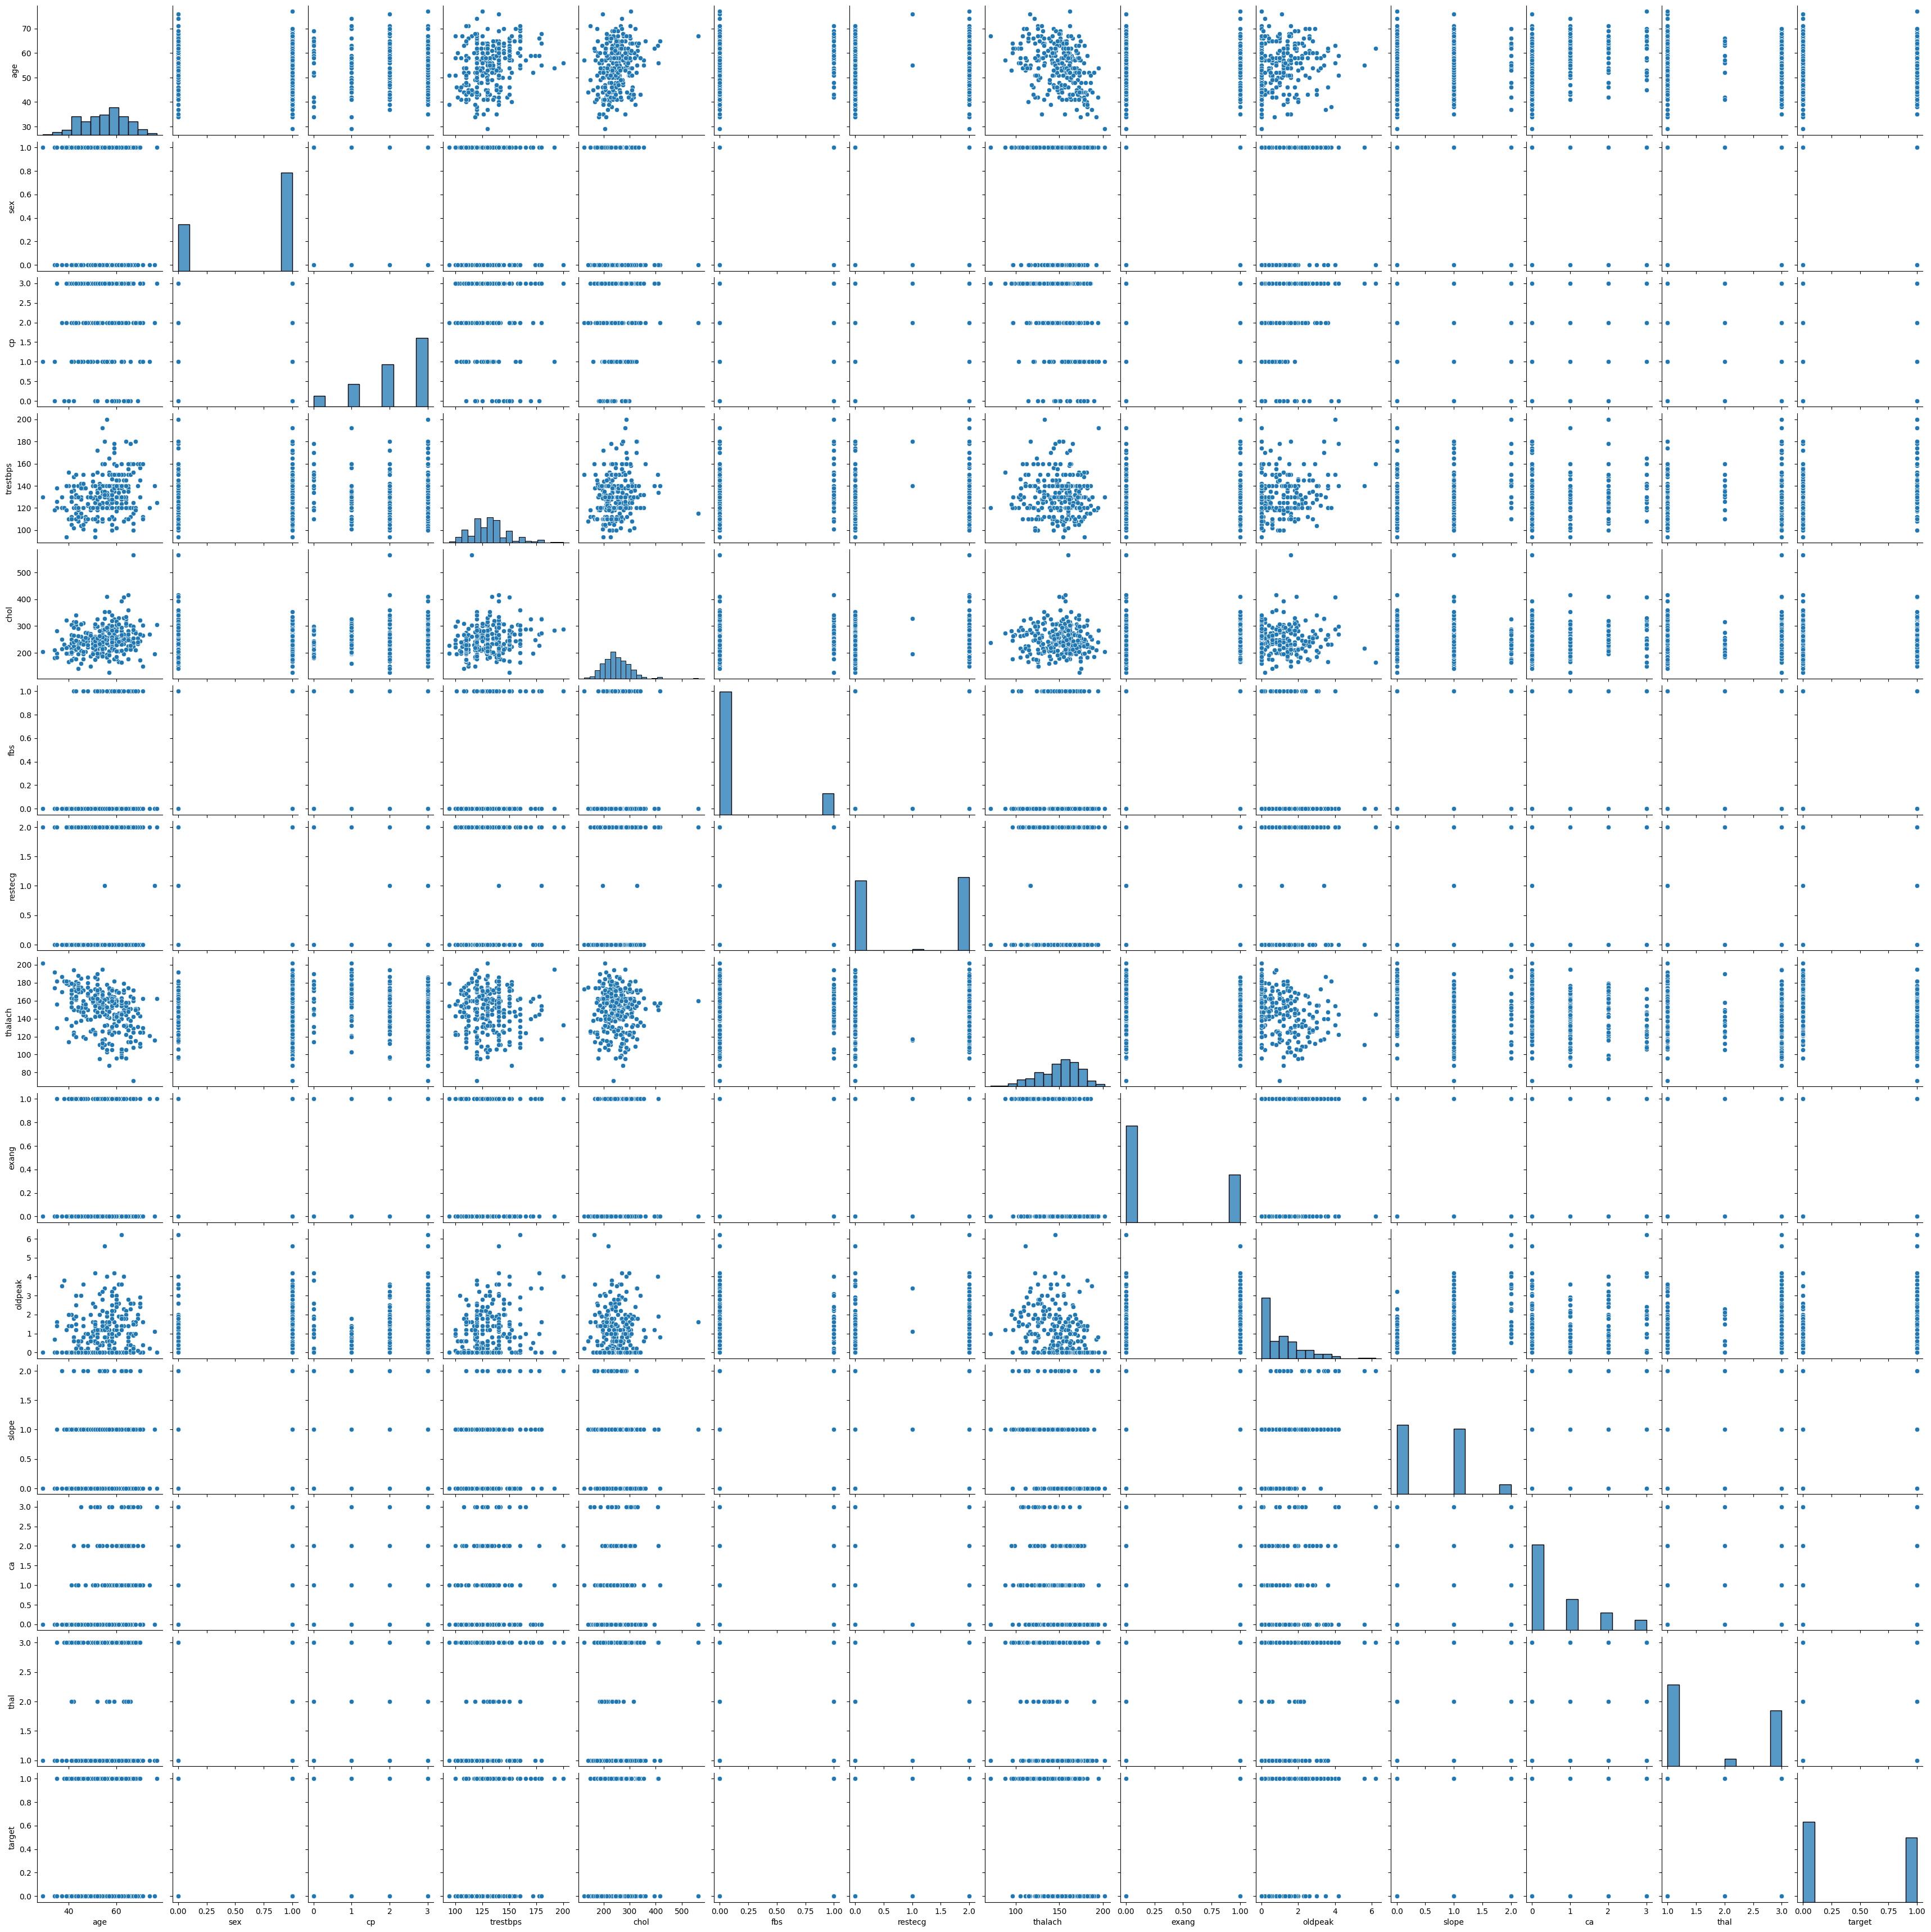

In [58]:
sns.pairplot(data)

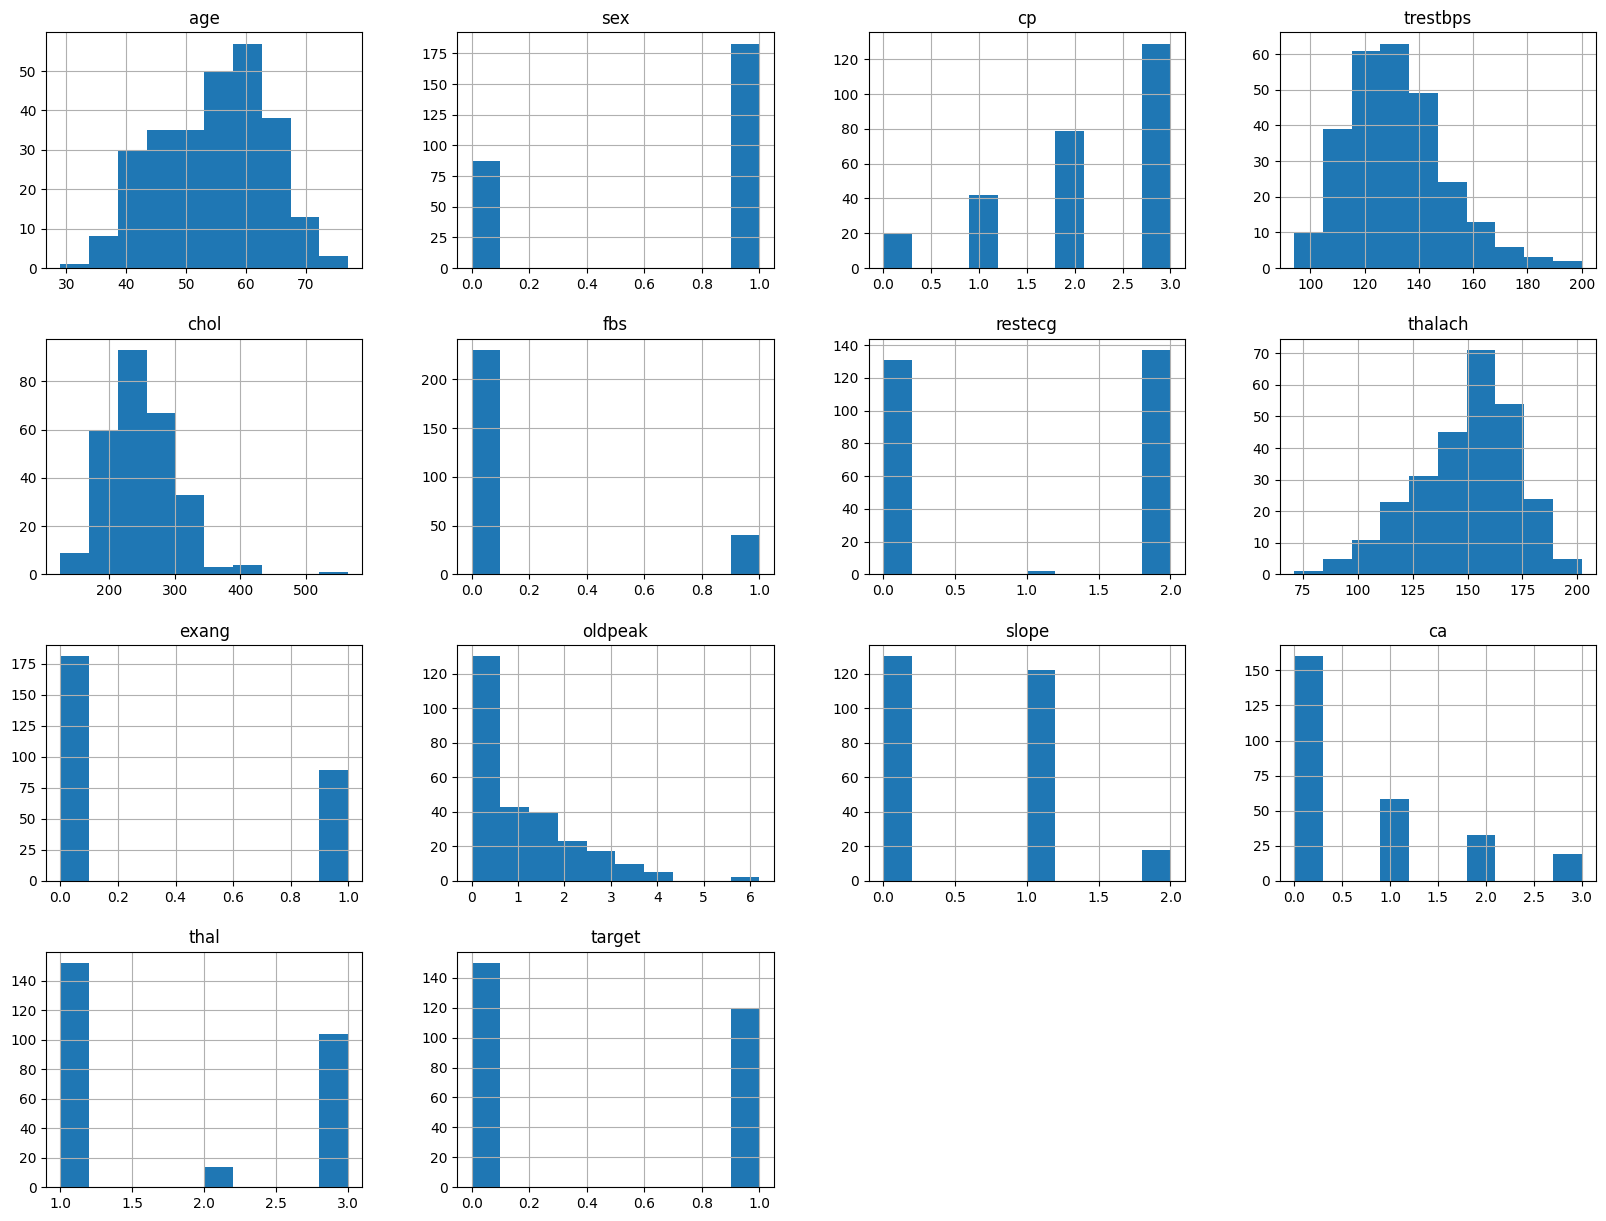

In [59]:
data.hist(figsize=(20,15))
plt.show()

Scaling the Data

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Building and fitting the model

In [61]:
predictor=Sequential()
predictor.add(Dense(activation="relu",input_dim=13,units=8,kernel_initializer="uniform"))
predictor.add(Dense(activation="relu",units=14,kernel_initializer="uniform"))
predictor.add(Dense(activation="sigmoid",units=1,kernel_initializer="uniform"))
predictor.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [62]:
output=predictor.fit(X_train,y_train,batch_size=8,epochs=100)

Epoch 1/100
27/27 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5556
Epoch 2/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5648
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.8056
Epoch 4/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.8796
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.8704
Epoch 6/100
27/27 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8796
Epoch 7/100
27/27 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.8796
Epoch 8/100
27/27 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8889
Epoch 9/100
27/27 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8889
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8889
Epoch 11/

In [64]:
y_pred=predictor.predict(X_test)
y_pred=(y_pred>0.5)

2/2 [==============================] - 0s 2ms/step


In [65]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[26,  4],
       [ 7, 17]], dtype=int64)

In [66]:
accuracy=((cm[0][0]+cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1]))*100
print(accuracy)

79.62962962962963


Plotting the accuracy and loss curve

In [63]:
output.history.keys()

dict_keys(['loss', 'accuracy'])

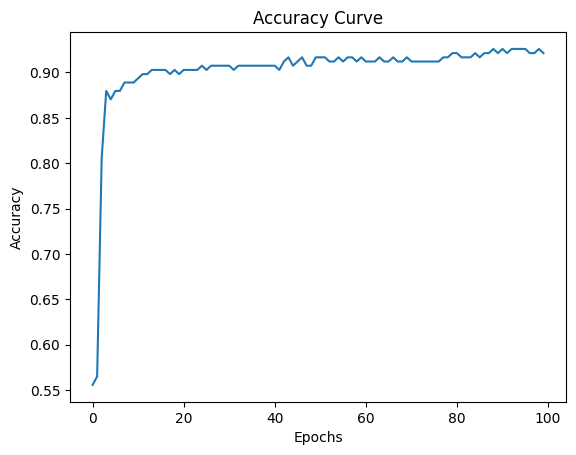

In [67]:
plt.plot(output.history['accuracy'])
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

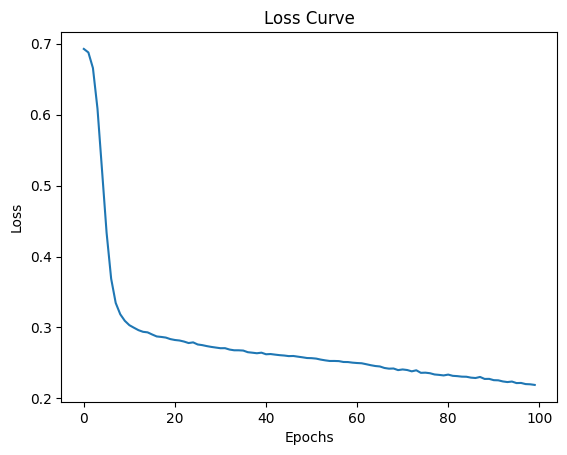

In [68]:
plt.plot(output.history['loss'])
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()